In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

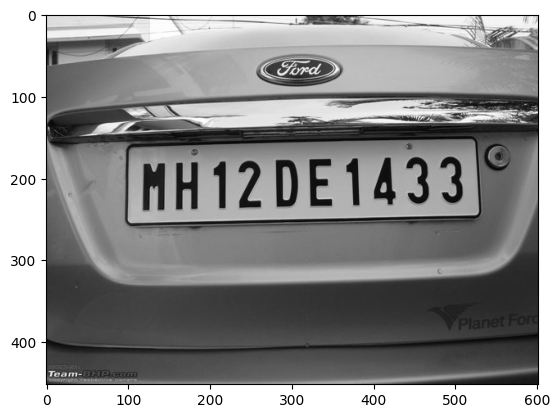

In [68]:
img = cv2.imread('num_plate_7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

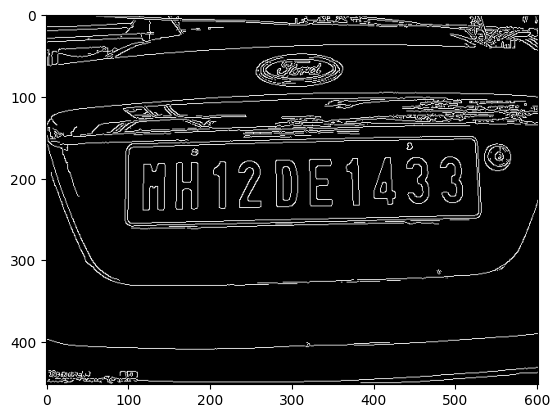

In [69]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [70]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [71]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [72]:
print(location)

[[[526 155]]

 [[104 158]]

 [[ 96 252]]

 [[525 249]]]


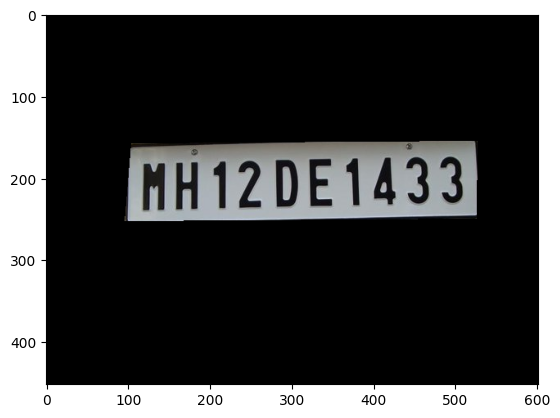

In [73]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

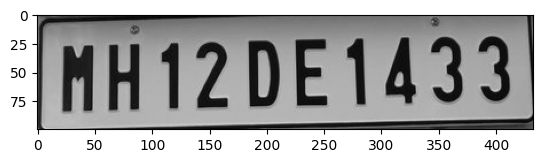

In [74]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [75]:
    reader = easyocr.Reader(['en'])
    
    result = reader.readtext(cropped_image)
    
    print(result)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 6], [428, 6], [428, 98], [10, 98]], 'MH12 DE 1433', 0.48203362336955663)]


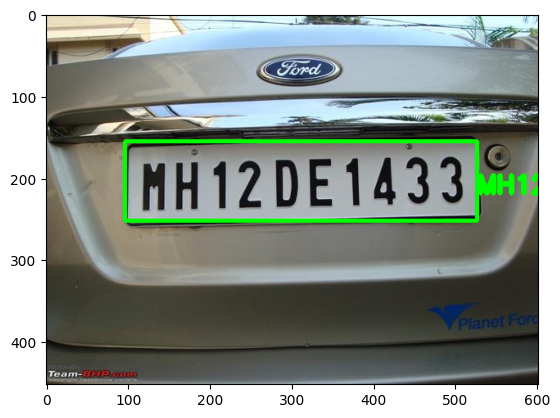

In [76]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))